In [1]:
import gensim
from gensim.models import word2vec
from gensim.models import KeyedVectors
from sklearn.metrics.pairwise import cosine_similarity
import nltk
from nltk.corpus import stopwords

/home/aman/.local/lib/python3.6/site-packages/smart_open/ssh.py:34: UserWarning: paramiko missing, opening SSH/SCP/SFTP paths will be disabled.  `pip install paramiko` to suppress
  warnings.warn('paramiko missing, opening SSH/SCP/SFTP paths will be disabled.  `pip install paramiko` to suppress')


In [2]:
stop_words = set(stopwords.words('english'))

def text_processing(file):
    f = open(file, 'r', encoding='utf-8')
    text = f.read()
    
    #Tokenization : Convert to sentences and then to words
    sentences = nltk.sent_tokenize(text)
    
    data = []
    
    for sent in sentences:
        words = nltk.word_tokenize(sent)
        words = [w.lower() for w in words if len(w)>2 and w not in stop_words]
        data.append(words)
        
    return data

text = text_processing("stars.txt")
print(text)
print("done")

[['the', 'name', 'bollywood', 'portmanteau', 'derived', 'bombay', 'former', 'name', 'mumbai', 'hollywood', 'california', 'center', 'american', 'film', 'industry'], ['bollywood', 'exist', 'physical', 'place'], ['the', 'name', 'bollywood', 'criticized', 'film', 'journalists', 'critics', 'arguing', 'makes', 'industry', 'look', 'like', 'poor', 'cousin', 'hollywood'], ['according', 'madhava', 'prasad-', 'author', 'ideology', 'hindi', 'film—2000', 'surviving', 'bollywood—2008', 'described', 'bollywood', 'inspired', 'tollywood', '—once', 'refer', 'cinema', 'west', 'bengal', 'dating', 'back', '1932'], ['tollywood', 'earliest', 'hollywood-inspired', 'name', 'referring', 'bengali', 'film', 'industry', 'based', 'tollygunge', 'calcutta', 'west', 'bengal', 'whose', 'name', 'reminiscent', 'hollywood', 'centre', 'cinema', 'india', 'time'], ['according', 'p.anandam', 'kavoori', 'aswin', 'punathambekar', 'book', 'global', 'bollywood', '2008', '—the', 'popular', 'calcutta-based', 'junior', 'statesman', 

In [3]:
from gensim.models import Word2Vec

model = Word2Vec(text, size=300, window = 10, min_count=1)
print(model)
words = list(model.wv.vocab)
print(words)
print(len(words))

Word2Vec(vocab=119, size=300, alpha=0.025)
['the', 'name', 'bollywood', 'portmanteau', 'derived', 'bombay', 'former', 'mumbai', 'hollywood', 'california', 'center', 'american', 'film', 'industry', 'exist', 'physical', 'place', 'criticized', 'journalists', 'critics', 'arguing', 'makes', 'look', 'like', 'poor', 'cousin', 'according', 'madhava', 'prasad-', 'author', 'ideology', 'hindi', 'film—2000', 'surviving', 'bollywood—2008', 'described', 'inspired', 'tollywood', '—once', 'refer', 'cinema', 'west', 'bengal', 'dating', 'back', '1932', 'earliest', 'hollywood-inspired', 'referring', 'bengali', 'based', 'tollygunge', 'calcutta', 'whose', 'reminiscent', 'centre', 'india', 'time', 'p.anandam', 'kavoori', 'aswin', 'punathambekar', 'book', 'global', '2008', '—the', 'popular', 'calcutta-based', 'junior', 'statesman', 'youth', 'magazine', 'establishing', 'precedent', 'industries', 'use', 'similar-sounding', 'names', 'eventually', 'leading', 'coining', 'referred', 'telugu', 'part', 'indian', 'ox

/home/aman/.local/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `similar_by_word` (Method will be removed in 4.0.0, use self.wv.similar_by_word() instead).
  # This is added back by InteractiveShellApp.init_path()
/home/aman/.local/lib/python3.6/site-packages/ipykernel_launcher.py:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
/home/aman/.local/lib/python3.6/site-packages/ipykernel_launcher.py:16: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  app.launch_new_instance()


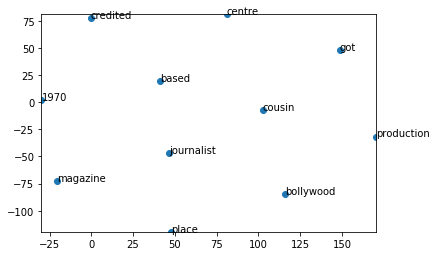

In [5]:
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt

def display_closestwords_tsnescatterplot(model, word):
    
    arr = np.empty((0,300), dtype='f')
    word_labels = [word]

    # get close words
    close_words = model.similar_by_word(word)
    
    # add the vector for each of the closest words to the array
    arr = np.append(arr, np.array([model[word]]), axis=0)
    for wrd_score in close_words:
        wrd_vector = model[wrd_score[0]]
        word_labels.append(wrd_score[0])
        arr = np.append(arr, np.array([wrd_vector]), axis=0)
        
    # find tsne coords for 2 dimensions
    tsne = TSNE(n_components=2, random_state=0)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)

    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    # display scatter plot
    plt.scatter(x_coords, y_coords)

    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
    plt.xlim(x_coords.min()+0.00005, x_coords.max()+0.00005)
    plt.ylim(y_coords.min()+0.00005, y_coords.max()+0.00005)
    plt.show()
    
display_closestwords_tsnescatterplot(model, 'bollywood')